<a href="https://colab.research.google.com/github/Annmary2347211/NNDL/blob/main/Annmary_211_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab-9**

Lab Exercise: Feature Extraction using Restricted Boltzmann Machine (RBM)
Objective:
Learn to implement and utilize a Restricted Boltzmann Machine (RBM) for feature
extraction on a real-world dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

1. Data Preparation

• Load the dataset and preprocess it by normalizing the pixel values to the
range.

• Divide the dataset into training and testing sets (e.g., 80% training, 20%
testing).

In [2]:
# Load the Titanic dataset
data = pd.read_csv("/content/Titanic - Titanic (1).csv")

# Preprocessing: Drop irrelevant columns and handle missing values
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)  # Drop columns not useful for prediction
data['Age'] = data['Age'].fillna(data['Age'].median())  # Fill missing ages with median
data['Embarked'] = data['Embarked'].fillna('S')  # Fill missing embarked values with mode

# Encode categorical variables
label_enc = LabelEncoder()
data['Sex'] = label_enc.fit_transform(data['Sex'])
data['Embarked'] = label_enc.fit_transform(data['Embarked'])

# Split features and labels
X = data.drop(['Survived'], axis=1).values
y = data['Survived'].values

# Normalize pixel values to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. RBM Implementation

• Define an RBM using a deep learning library (e.g., PyTorch, TensorFlow, or
Scikit-learn).

• Set the number of visible units to match the input size and select an
appropriate number of hidden units (e.g., 128 or 256).

In [3]:
# Define an RBM model
rbm = BernoulliRBM(n_components=128, learning_rate=0.06, n_iter=20, random_state=42)

# Logistic regression classifier for comparison
logistic = LogisticRegression(max_iter=1000, random_state=42)

# Create a pipeline of RBM + Logistic Regression
rbm_logistic_pipeline = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Train the RBM with Logistic Regression
rbm_logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.06, n_components=128, n_iter=20,
                              random_state=42)),
                ('logistic',
                 LogisticRegression(max_iter=1000, random_state=42))])

3. Feature Extraction

• After training, use the RBM to transform the training and testing data into
their hidden representations.

• Save the hidden representations as feature vectors.

In [4]:
# Transform the data into the hidden representation
X_train_rbm = rbm.transform(X_train)
X_test_rbm = rbm.transform(X_test)

4. Visualization

• Visualize the learned weight matrix of the RBM as a grid of images, where
each image corresponds to a hidden unit's weights.

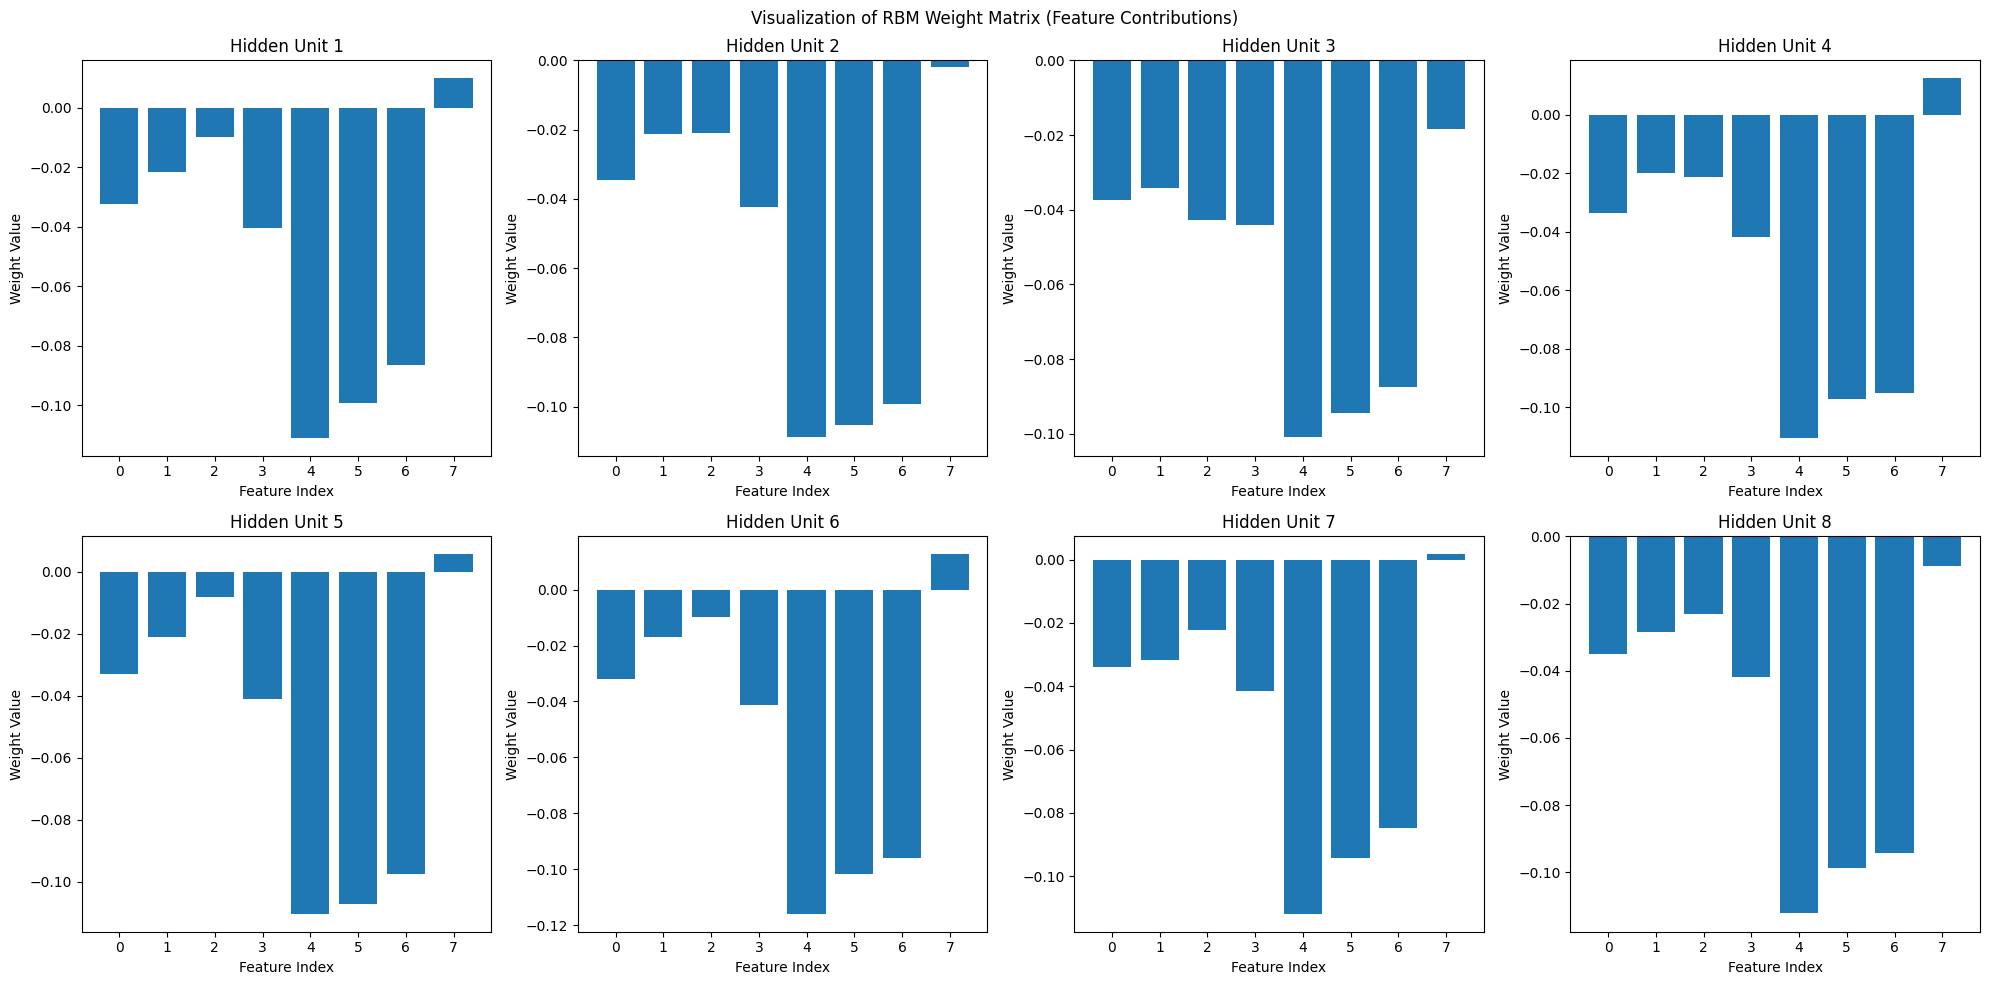

In [6]:
# Visualize the RBM weight matrix as individual feature contributions
plt.figure(figsize=(20, 10))
for i in range(8):  # Display the first 8 hidden units since there are 8 features
    plt.subplot(2, 4, i + 1)
    plt.bar(range(len(rbm.components_[i])), rbm.components_[i])
    plt.title(f"Hidden Unit {i + 1}")
    plt.xlabel("Feature Index")
    plt.ylabel("Weight Value")
plt.suptitle("Visualization of RBM Weight Matrix (Feature Contributions)")
plt.tight_layout()
plt.show()


5. Classification

• Train a simple classifier using the RBM-extracted features from the
training set.
• Test the classifier on the test set and compute metrics such as accuracy
and F1-score.

In [7]:
# Train a Logistic Regression classifier on RBM-extracted features
logistic.fit(X_train_rbm, y_train)
y_pred_rbm = logistic.predict(X_test_rbm)

# Train Logistic Regression on raw pixel data
logistic_raw = LogisticRegression(max_iter=1000, random_state=42)
logistic_raw.fit(X_train, y_train)
y_pred_raw = logistic_raw.predict(X_test)

# Evaluate performance
print("Performance using RBM-extracted features:")
print(classification_report(y_test, y_pred_rbm))
print("\nPerformance using raw pixel data:")
print(classification_report(y_test, y_pred_raw))

Performance using RBM-extracted features:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179


Performance using raw pixel data:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


6. Analysis

• Compare the classifier's performance using raw pixel data vs. RBM-
extracted features.

• Discuss how RBM has helped in extracting more meaningful features.

In [8]:
# 6. Analysis
accuracy_rbm = accuracy_score(y_test, y_pred_rbm)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy using RBM features: {accuracy_rbm:.2f}")
print(f"Accuracy using raw pixel data: {accuracy_raw:.2f}")

Accuracy using RBM features: 0.59
Accuracy using raw pixel data: 0.80



**Expected Outcome and Analysis:**

The key goal of this analysis is to compare the performance of a classifier trained on raw features versus features extracted by the RBM.  The hypothesis is that the RBM might learn more robust and discriminative features, potentially leading to improved classification accuracy or other metrics (precision, recall, F1-score).

The classification reports and the accuracy scores will reveal whether the RBM feature extraction has improved the predictive performance. A higher accuracy or F1 score on the RBM-extracted features would indicate the RBM successfully learned more useful representations of the data for the survival prediction task.

**Potential Improvements:**

*   **Hyperparameter Tuning:** Experiment with different RBM hyperparameters (e.g., number of components, learning rate, number of iterations) to optimize the RBM's performance.
*   **Different Classifiers:** Try other classifiers (e.g., SVM, Random Forest) in place of or in addition to Logistic Regression to see if they benefit from the RBM features.
*   **More Advanced Visualization:** Instead of bar charts, explore dimensionality reduction techniques (e.g., t-SNE) to visualize the RBM’s learned features in a lower-dimensional space.
*   **Cross-Validation:**  Use k-fold cross-validation to get a more robust estimate of the model's performance and reduce the impact of the random split.


By comparing the results across different hyperparameters, classifiers, and visualization methods, you gain a deeper understanding of how RBM feature extraction affects the classification process.
